# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [12]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


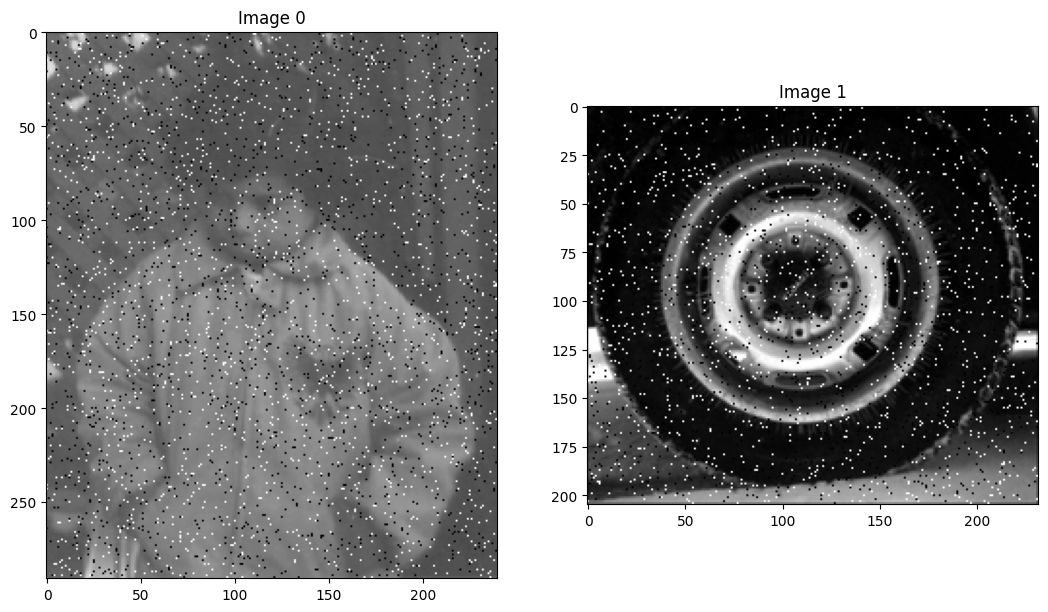

In [13]:
img0 = io.imread('pout.tif')
img1 = io.imread('tire.tif')

img0 = random_noise(img0, mode="s&p", amount=0.05)
img1 = random_noise(img1, mode="s&p", amount=0.05)

show_images([img0, img1], ['Image 0', 'Image 1'])

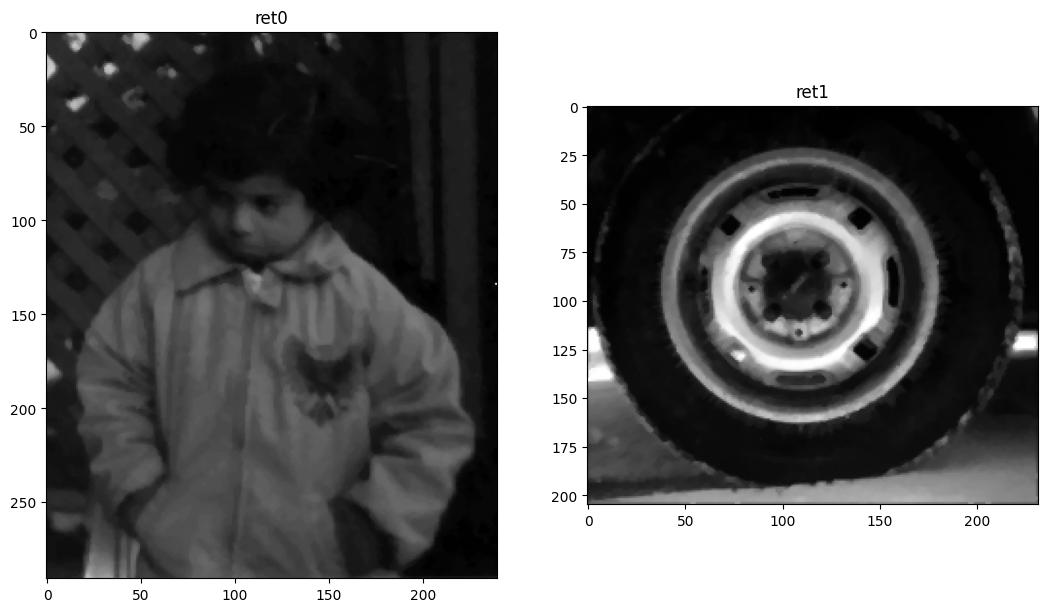

In [45]:
'''
(1) Your own median filter algorithm
'''
def custom_median_filter(img: np.ndarray) -> np.ndarray:
    row, col = img.shape
    ret = np.ones((row+2, col+2), dtype=img.dtype)
    ret[1:-1, 1:-1] = img.copy()
    ret[:, 0] = ret[:, 1]
    ret[:, -1] = ret[:, -2]
    ret[0, :] = ret[1, :]
    ret[-1, :] = ret[-2, :]
    for i in range(1, row+1):
        for j in range(1, col+1):
            matrix = ret[i-1:i+2, j-1:j+2]
            median = np.median(matrix)
            ret[i, j] = median
    return ret[1:-1, 1:-1]
ret0 = custom_median_filter(img0)
ret1 = custom_median_filter(img1)
show_images([ret0, ret1], ['ret0', 'ret1'])

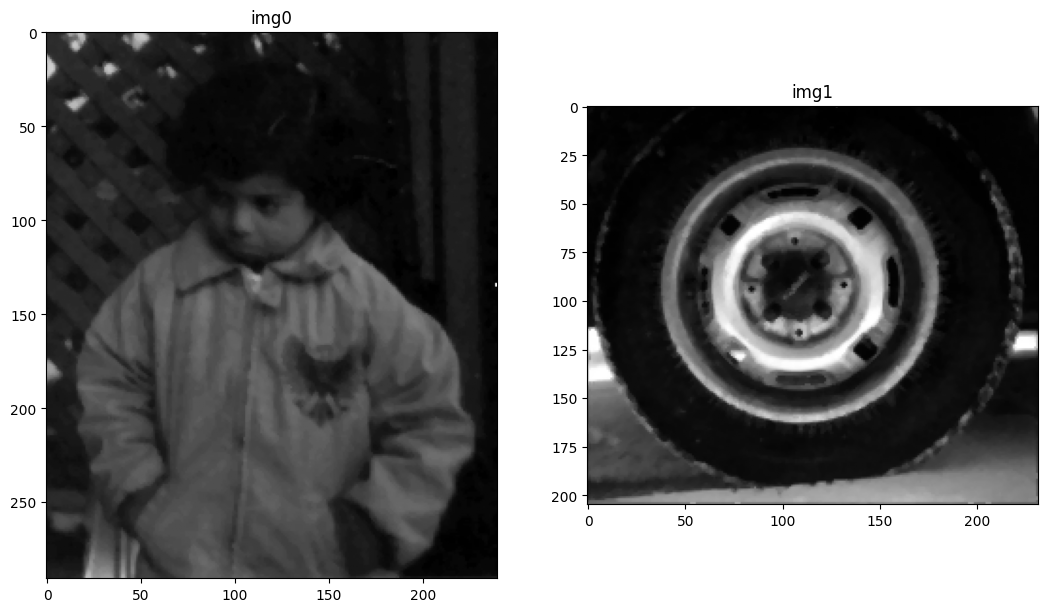

In [15]:
'''
(2) skimage median filter
'''
from skimage.filters import median
ret0 = median(img0)
ret1 = median(img1)
show_images([ret0, ret1], ['img0', 'img1'])

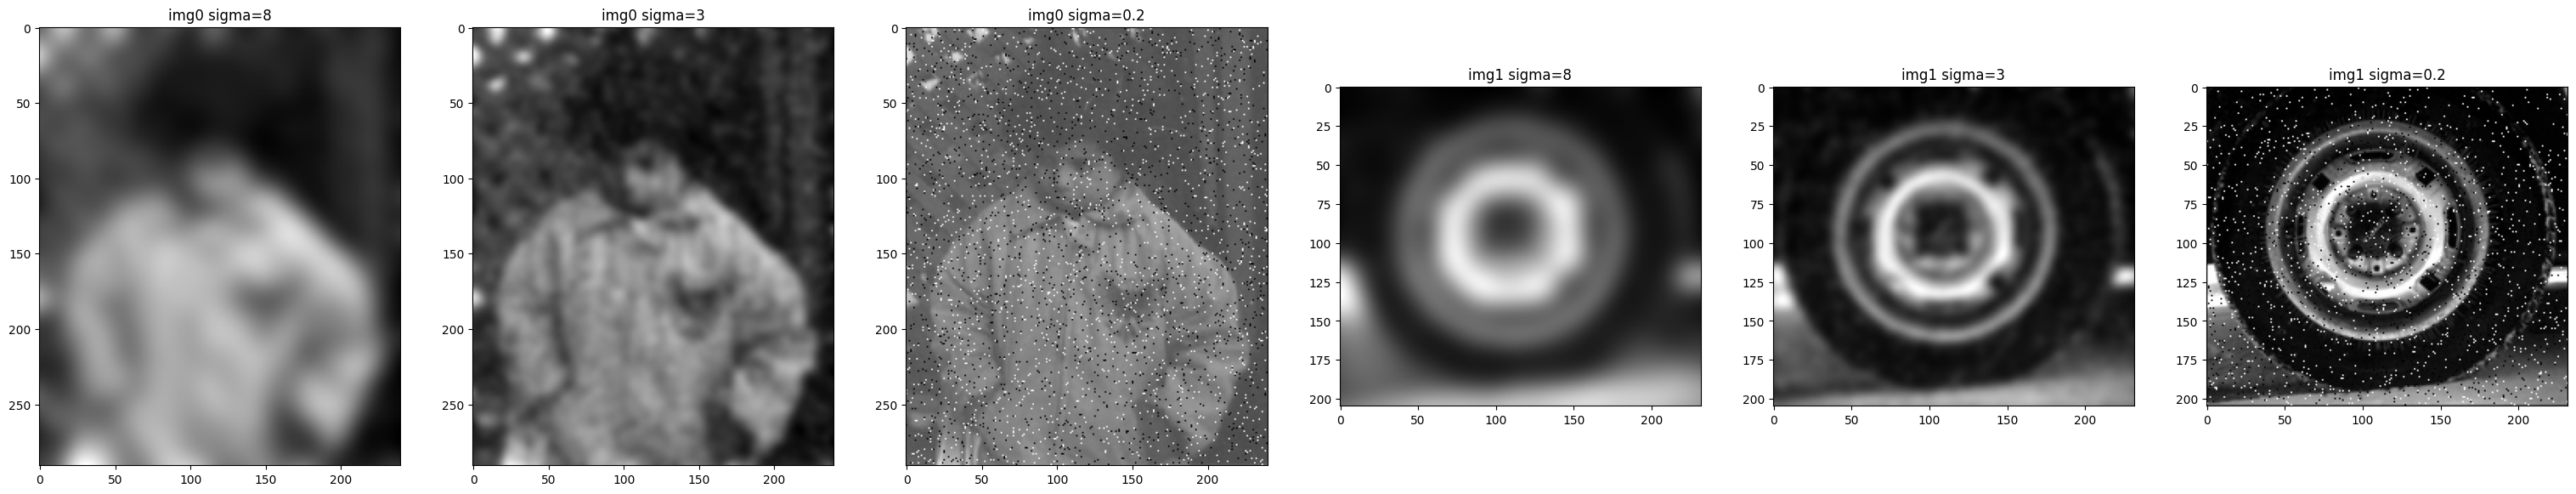

In [ ]:
'''
(3) Gaussion Filters
'''
from skimage.filters import gaussian
ret0_0 = gaussian(img0, sigma=8)
ret0_1 = gaussian(img0, sigma=3)
ret0_2 = gaussian(img0, sigma=0.2)
ret1_0 = gaussian(img1, sigma=8)
ret1_1 = gaussian(img1, sigma=3)
ret1_2 = gaussian(img1, sigma=0.2)
show_images([ret0_0, ret0_1, ret0_2, ret1_0, ret1_1, ret1_2],
            ['img0 sigma=8', 'img0 sigma=3', 'img0 sigma=0.2', 'img1 sigma=8', 'img1 sigma=3', 'img1 sigma=0.2'])

# Choose gaussian
# sigma = 3